# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.


**Описание данных:**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://*****/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


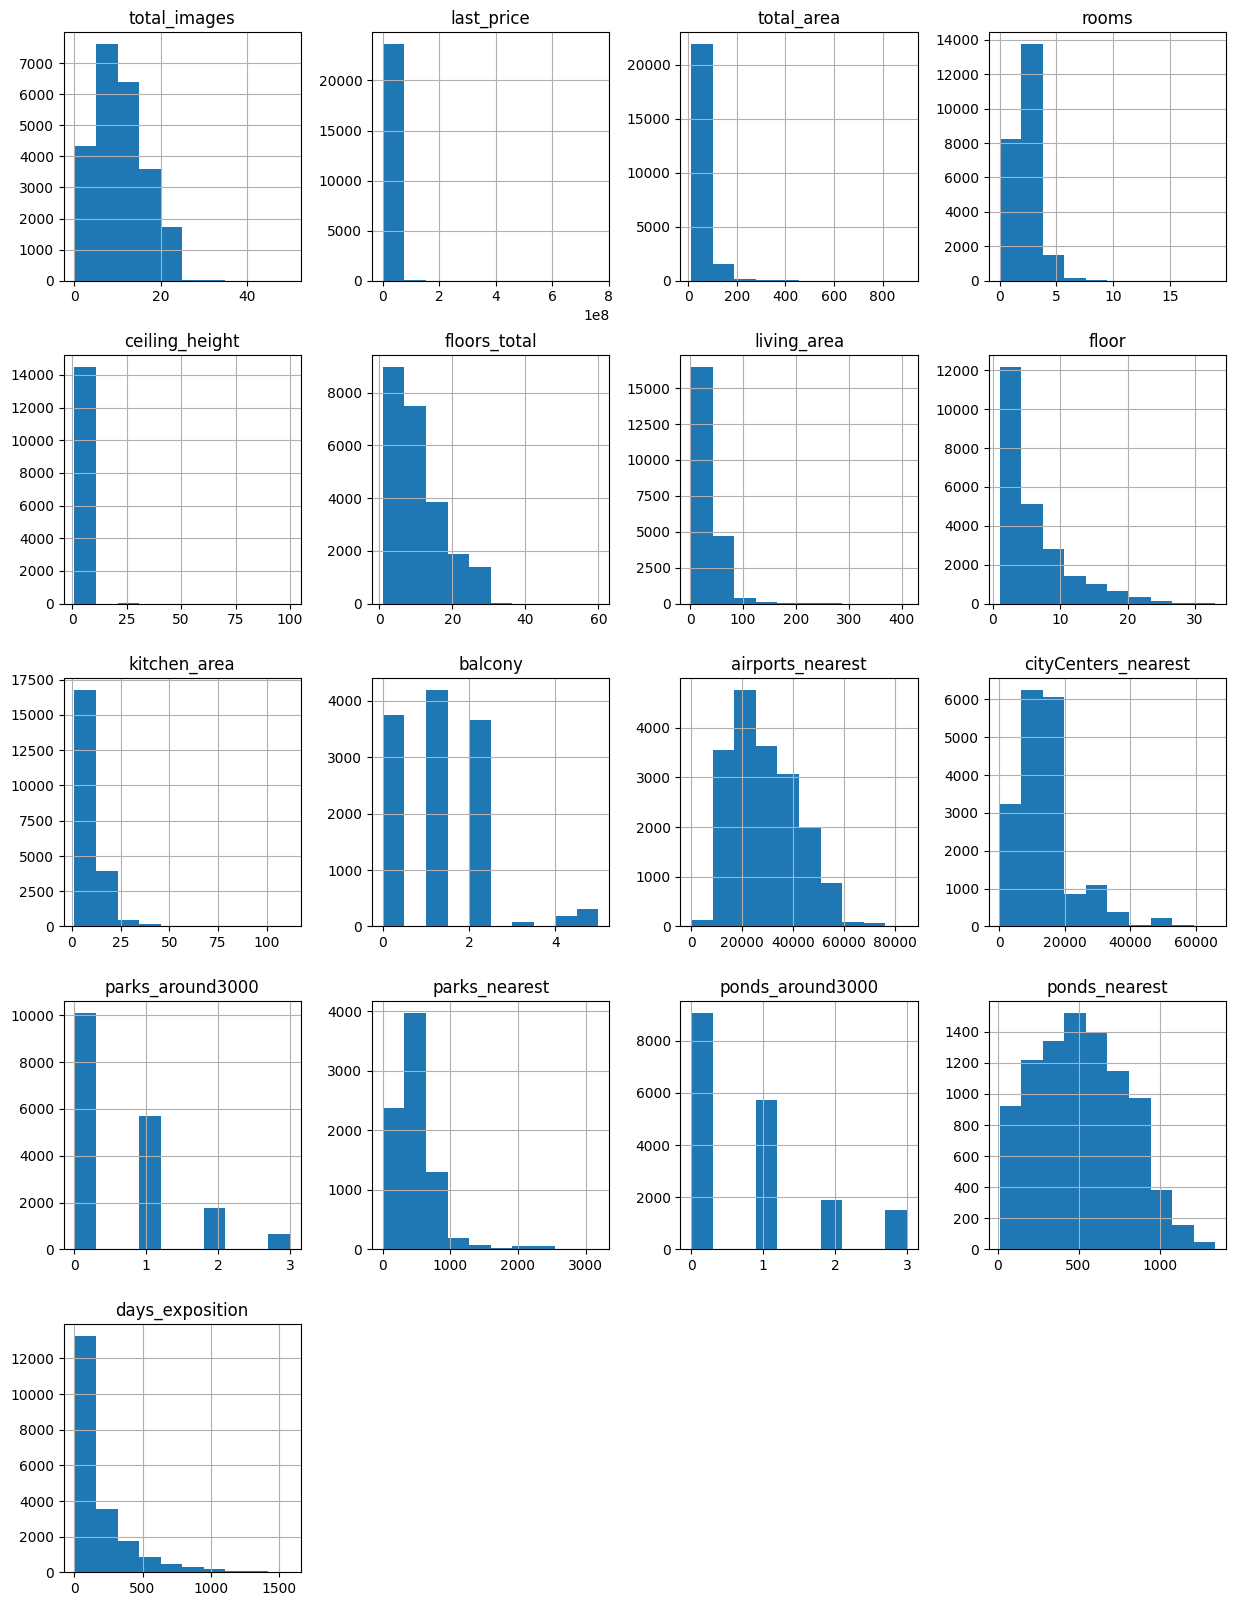

In [3]:
data.hist(figsize=(15, 20));

## Предобработка данных

### Найдём и изучим пропущенные значения в столбцах

Выведим количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Если в дальшейшем мы планируем заменять какие либо значения на медианные/средние (сгрупировав по названию населенного пункта - `locality_name`), то сначала нужно устранить неявные дубликаты `locality_name`.

Пропуски в `locality_name` заменим на **unknown** (хоть у нас и есть данные `cityCenters_nearest` - удаленность от цетнра города, по ним мы не может определить населенный пункт), удалять их не будем, их данные нам ещё пригодятся.

In [5]:
data.loc[data['locality_name'].isna(), 'locality_name'] = 'unknown'

Создадим новый столбец `local_name` без дубликатов `locality_name`. Для этого напишем функцию:

In [6]:
#чтобы отфлитровать строку locality_name, найдем дубликаты названий посёлков 
#выпишем их из data['locality_name'].unique()
#заменим букву "ё" на "е"
del_words = ["поселок ", "деревня ", "городской ", "городского ", "типа ", 
             "станции ", "село ", "имени ", "коттеджный ", "при железнодорожной станции ", 
             "садовое товарищество ", "садоводческое некоммерческое товарищество ", 
             "при железнодорожной "]
def local_name(locality_name):
    name = str(locality_name)
    name = re.sub(r'ё', 'е', name)
    for word in del_words:
        name = re.sub(word, '', name)
    return name

In [7]:
data['local_name'] = data['locality_name'].apply(local_name)

---------------------------------------
Пропуски `ceiling_height` (высота потолков в метрах) заменим медианным значением

In [8]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data.ceiling_height.median()

---------------------------------------
Посмотрим `floors_total` (всего этажей в доме), из каких населённых пунктов пропуски:

In [9]:
data.loc[data['floors_total'].isna()].local_name.value_counts()

Санкт-Петербург    70
Мурино              4
Красное Село        2
Кудрово             2
Бугры               1
Стрельна            1
Новоселье           1
unknown             1
Шушары              1
Щеглово             1
Токсово             1
Новое Девяткино     1
Name: local_name, dtype: int64

Этажность в городах может различаться, узнаем медианное значение этажности в каждом населённом пункте, и заменим ими пропуски.

In [10]:
for t in data['local_name'].unique():
    data.loc[(data['local_name'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['local_name'] == t), 'floors_total'].median()

---------------------------------------
Изучим пропуски `is_apartment`(апартаменты или нет), посмотрим из каких значений состоит столбец:

In [11]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Судя по всему эта колонка должна пренадлежать булевому типу, а пропуски это *False*, т.к. на рынке больше квартир, а не апартаментов. 

Заменим сначала пропуски на *False*, а затем тип столбца с *object* на *bool* (иначе всё, что не *False* превратится в *True*, и всё нам испортит)

In [12]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype(bool)

---------------------------------------
Пропуски `living_area` (жилая площадь в м²) заменим на среднюю жилую площадь, в зависимости от общей площади объекта.

In [13]:
#посчитаем средюю долю жилой площади от общей площади объекта
living_area_mean = round(data.living_area.mean() * 100 / data.total_area.mean(), 2)
#заменим пропуски
data.loc[data['living_area'].isna(), 'living_area'] = round(data['total_area'] * living_area_mean / 100, 2)

Аналогично и с  `kitchen_area` (жилая площадь кухни в м²), пропуски заменим на среднюю площадь кухни, в зависимости от общей площади объекта.

In [14]:
#посчитаем средюю долю кухни от общей площади объекта
kitchen_area_mean = round(data.kitchen_area.mean() * 100 / data.total_area.mean(), 2)
#заменим пропуски
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = round(data['total_area'] * kitchen_area_mean / 100, 2)

---------------------------------------
Пропуски `balcony` (кол-во балконов), скорее всего в объявлении не указали количество балконов, т.к. их нет. Заменим пропуски на 0.

In [15]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

---------------------------------------
Пропуски в `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest` пренадлежат второму виду данных, по которым не получилось собрать информацию на основе картографических данных. 

Пропуски в `days_exposition` означает, что объявление ещё актуально.

Эти пропуски оставим без изменений, т.к. логически их заменить невозможно.

### Рассмотрим типы данных в каждом столбце

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [17]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_name
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.79,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.88,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург


Поменяем тип данных в столбцах, где не используется дробная часть, с `float64` на `int`:

In [18]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)

Переведем столбец `first_day_exposition` (дата публикации) в формат `datetime`, округлим до целого дня.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

### Найдем и устраним  редкие и выбивающиеся значения

Проверим количество строк-дубликатов в данных:

In [20]:
data.duplicated().sum()

0

Дубликатов не обнаружено.

Методом describe() изучим данные:

In [21]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.00000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.67007,34.594180,5.892358,10.506039,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.58781,22.354762,4.885249,6.039819,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.00000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.00000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.00000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.00000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.00000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим выбивающиеся значения: общая жилая площадь 900 кв.м., кол-во комнат 0 и 19, высота потолков 1 и 100 метров, 5 балконов..

Пройдемся по каждому столбцу и устраним их.

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `total_images`(число фотографий квартиры в объявлении):

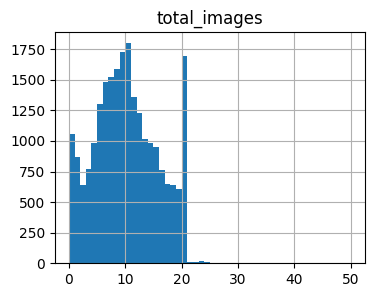

In [22]:
data.hist('total_images', bins = 50, figsize=(4, 3));

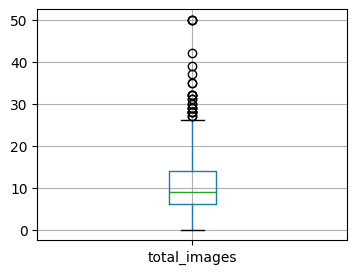

In [23]:
data.boxplot('total_images', figsize=(4, 3));

Видим всплеск на значении 20, скорее всего это максимальное кол-во фотографий на одно объявление.

Оставим данные с количеством фото до 20 включительно.

In [24]:
data = data.query('total_images <= 20')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `last_price`(цена на момент снятия с публикации):

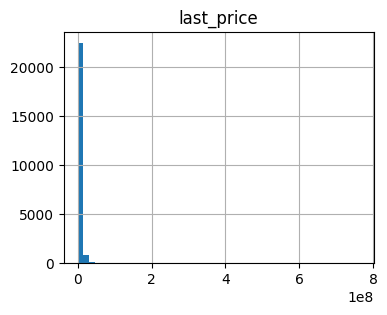

In [25]:
data.hist('last_price', bins = 50, figsize=(4, 3));

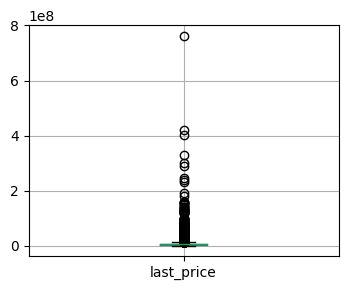

In [26]:
data.boxplot('last_price', figsize=(4, 3));

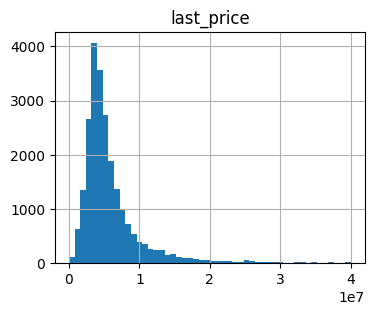

In [27]:
#рассмотрим значения поближе
data.hist('last_price', bins = 50, figsize=(4, 3), range=(0, 40000000));

Оставим недвижимость с ценой от 400 тыс. до 27 млн.

In [28]:
data = data.query('400000 <= last_price <= 27000000')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `total_area`(общая площадь квартиры в квадратных метрах):

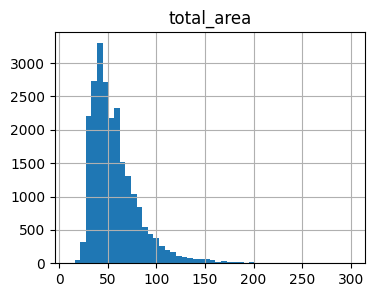

In [29]:
data.hist('total_area', bins = 50, range=(10, 300), figsize=(4, 3));

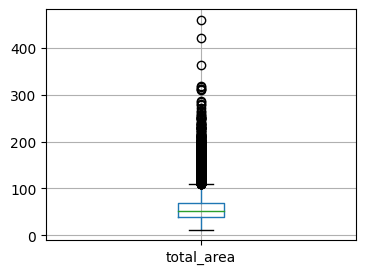

In [30]:
data.boxplot('total_area', figsize=(4, 3));

Оставим объявления, где общая площадь от 14 до 220 квадратных метров.

In [31]:
data = data.query('14 <= total_area <= 220')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `rooms`(число комнат):

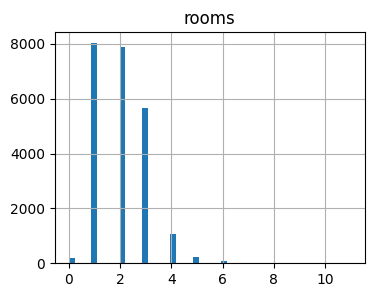

In [32]:
data.hist('rooms', bins = 50, figsize=(4, 3));

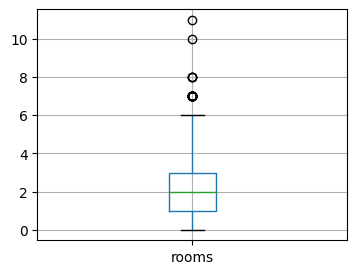

In [33]:
data.boxplot('rooms', figsize=(4, 3));

In [34]:
#посчитаем кол-во объявлений для каждой категории
data['rooms'].value_counts().head(20)

1     8024
2     7893
3     5652
4     1079
5      241
0      195
6       66
7       26
8        3
10       1
11       1
Name: rooms, dtype: int64

Объявления с 0 комнатами, скорее всего студии, поменяем значение на 1 и оставим в датафрейме только строки до 5 комнат включительно.

In [35]:
data.loc[(data['rooms'] == 0), 'rooms'] = 1
data = data.query('rooms <= 5')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `ceiling_height`(высота потолков):

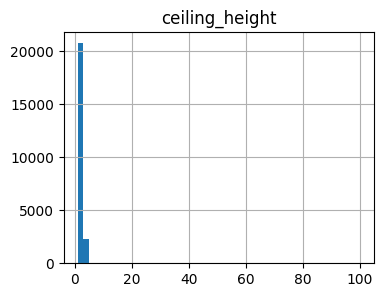

In [36]:
data.hist('ceiling_height', bins = 50, figsize=(4, 3));

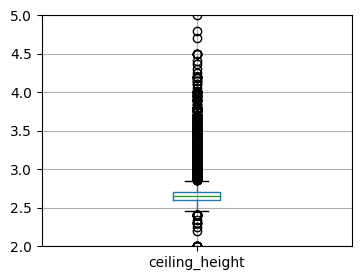

In [37]:
data.boxplot('ceiling_height', figsize=(4, 3))
plt.ylim(2, 5);

In [38]:
data['ceiling_height'].value_counts().head(15)

2.65    9647
2.50    3508
2.60    1640
2.70    1564
3.00    1029
2.80     984
2.55     976
2.75     899
3.20     245
3.10     183
2.90     157
2.56     139
3.30     116
3.50     103
2.57     102
Name: ceiling_height, dtype: int64

Оставим недвижимость с потолками от 2.4 до 4 метров.

In [39]:
data = data.query('2.4 <= ceiling_height <= 4')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `floors_total`(всего этажей в доме):

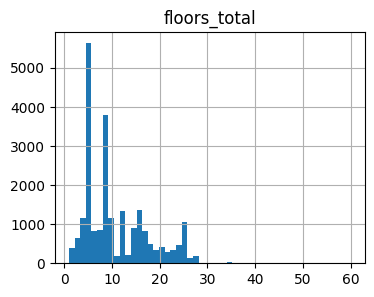

In [40]:
data.hist('floors_total', bins = 50, figsize=(4, 3));

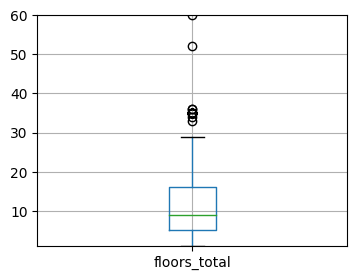

In [41]:
data.boxplot('floors_total', figsize=(4, 3))
plt.ylim(1, 60);

Оставим недвижимость с этажность до 30.

In [42]:
data = data.query('floors_total <= 30')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `living_area`(жилая площадь в квадратных метрах):

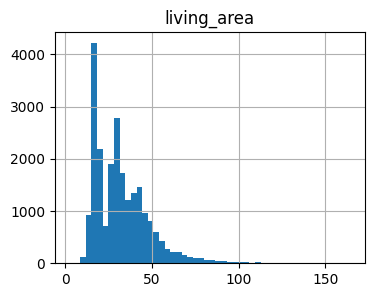

In [43]:
data.hist('living_area', bins = 50, figsize=(4, 3));

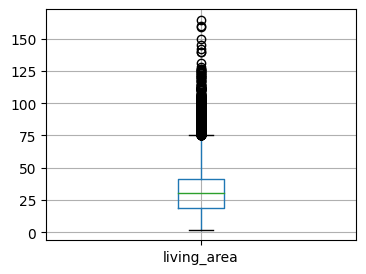

In [44]:
data.boxplot('living_area', figsize=(4, 3));

Оставим объявления, где жилая площадь до 120 квадратных метров.

In [45]:
data = data.query('living_area <= 120')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `floor`(этаж объекта):

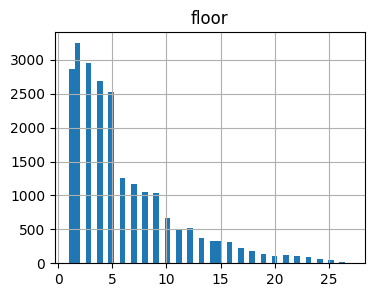

In [46]:
data.hist('floor', bins = 50, figsize=(4, 3));

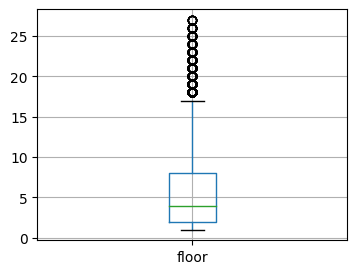

In [47]:
data.boxplot('floor', figsize=(4, 3));

Видим, что большинство объектов расположены на 1-5 этажах.

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `kitchen_area`(площадь кухни в квадратных метрах):

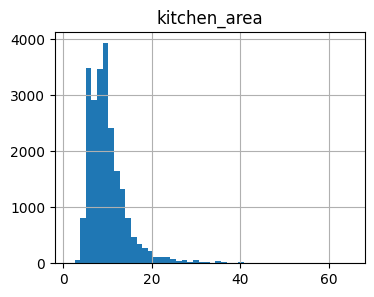

In [48]:
data.hist('kitchen_area', bins = 50, figsize=(4, 3));

(0.0, 60.0)

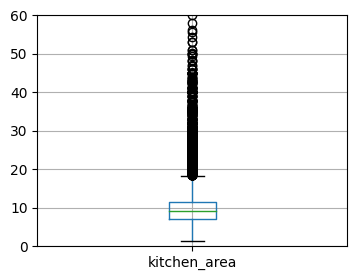

In [49]:
data.boxplot('kitchen_area', figsize=(4, 3));
plt.ylim(0, 60)

Оставим объявления, где площадь кухни до 30 квадратных метров.

In [50]:
data = data.query('kitchen_area <= 30')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `balcony`(число балконов):

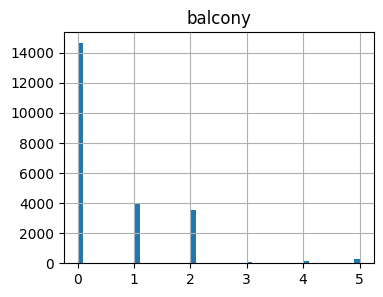

In [51]:
data.hist('balcony', bins = 50, figsize=(4, 3));

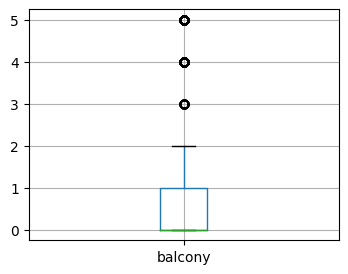

In [52]:
data.boxplot('balcony', figsize=(4, 3));

Больше 2х балконов редкость, уберем их из данных, они могут исказить данные, т.к. такие объекты могут отличаться средней ценой за квадратный метр, продолжительностью дней размещения на сайте и тп.

In [53]:
data = data.query('balcony <= 2')

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `cityCenters_nearest`(расстояние до центра города в метрах):

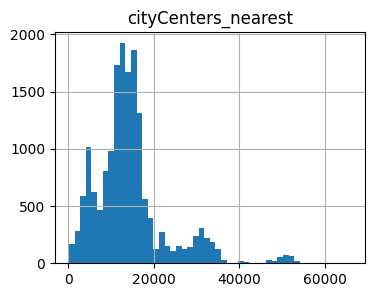

In [54]:
data.hist('cityCenters_nearest', bins = 50, figsize=(4, 3));

Видим 3 моды, до 20 км это Санкт-Петербург, около 30 и 50 км другие населенные пункты.

---------------------------------------
Построим гистограмму и диаграмму размаха по столбцу `days_exposition`(сколько дней было размещено объявление):

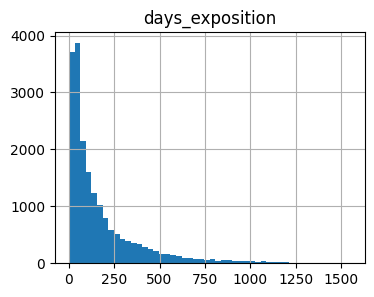

In [55]:
data.hist('days_exposition', bins = 50, figsize=(4, 3));

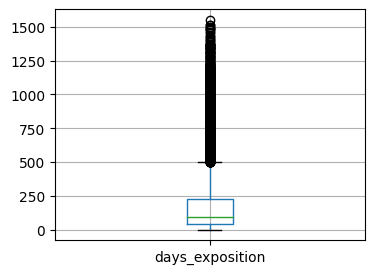

In [56]:
data.boxplot('days_exposition', figsize=(4, 3));

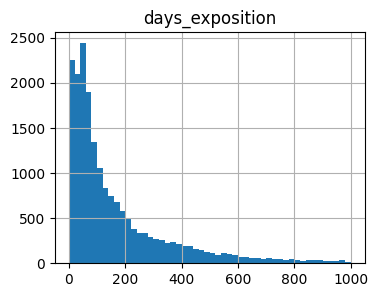

In [57]:
#посмотрим поближе
data.hist('days_exposition', bins = 50, figsize=(4, 3), range=(0, 1000));

Отбросим вторую половину, объявления с длительной продажей неликвидные объекты.

In [58]:
data = data.query('days_exposition <= 750')

---------------------------------------
<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив таблицы и графики, устранили пропущенные значения и изменили типы данных в столбцах, где это требуется, а так же, отбросили редкие и выбивающиеся значения из данных. Качество исходных данных можно считать приемлемым, есть описание данных, и нет непонятных отрицательных значений, артефактов и тп.

## Посчитаем и добавим в таблицу новые столбцы

Создадим новый столбец `price_meter`, поместим туда цену одного квадратного метра:

In [59]:
data['price_meter'] = (data['last_price'] / data['total_area']).astype(int)

Создадим новый столбец `day`, поместим туда день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [60]:
data['day'] = data['first_day_exposition'].dt.weekday

Создадим новый столбец `month` , поместим туда месяц публикации объявления:

In [61]:
data['month'] = data['first_day_exposition'].dt.month

Создадим новый столбец `year`, поместим туда год публикации объявления:

In [62]:
data['year'] = data['first_day_exposition'].dt.year

Создадим новый столбец `floor_category`, поместим туда тип этажа квартиры (значения — «‎первый», «последний», «другой»):

In [63]:
data.loc[(data['floor'] == 1), 'floor_category'] = 'первый'
data.loc[(data['floor'] == data['floors_total']), 'floor_category'] = 'последний'
data.loc[(data['floor_category'].isna()), 'floor_category'] = 'другой'

Создадим новый столбец `distance_toCity`, поместим туда расстояние до центра города в километрах.

In [64]:
data['distance_toCity'] = round(data['cityCenters_nearest'] / 1000)

Проверим правильно ли заполнили данные о площадях, если из общей площади объекта отнять жилую площадь и площадь кухни, она должна быть не меньше нуля.

Создадим новый столбец `check_area` и проведем расчёты:

In [65]:
data['check_area'] = (data['total_area'] - data['living_area'] - data['kitchen_area'])
#посмотрим сколько строк с отрицательной площадью
data.query('check_area < 0').check_area.count()

91

Мы нашли 91 строк, придётся с ними распрощаться.

In [66]:
data = data.query('check_area > 0')

---------------------------------------
**Ещё раз посмотрим на гистограму и избавимся от редких выбивающихся значений:**

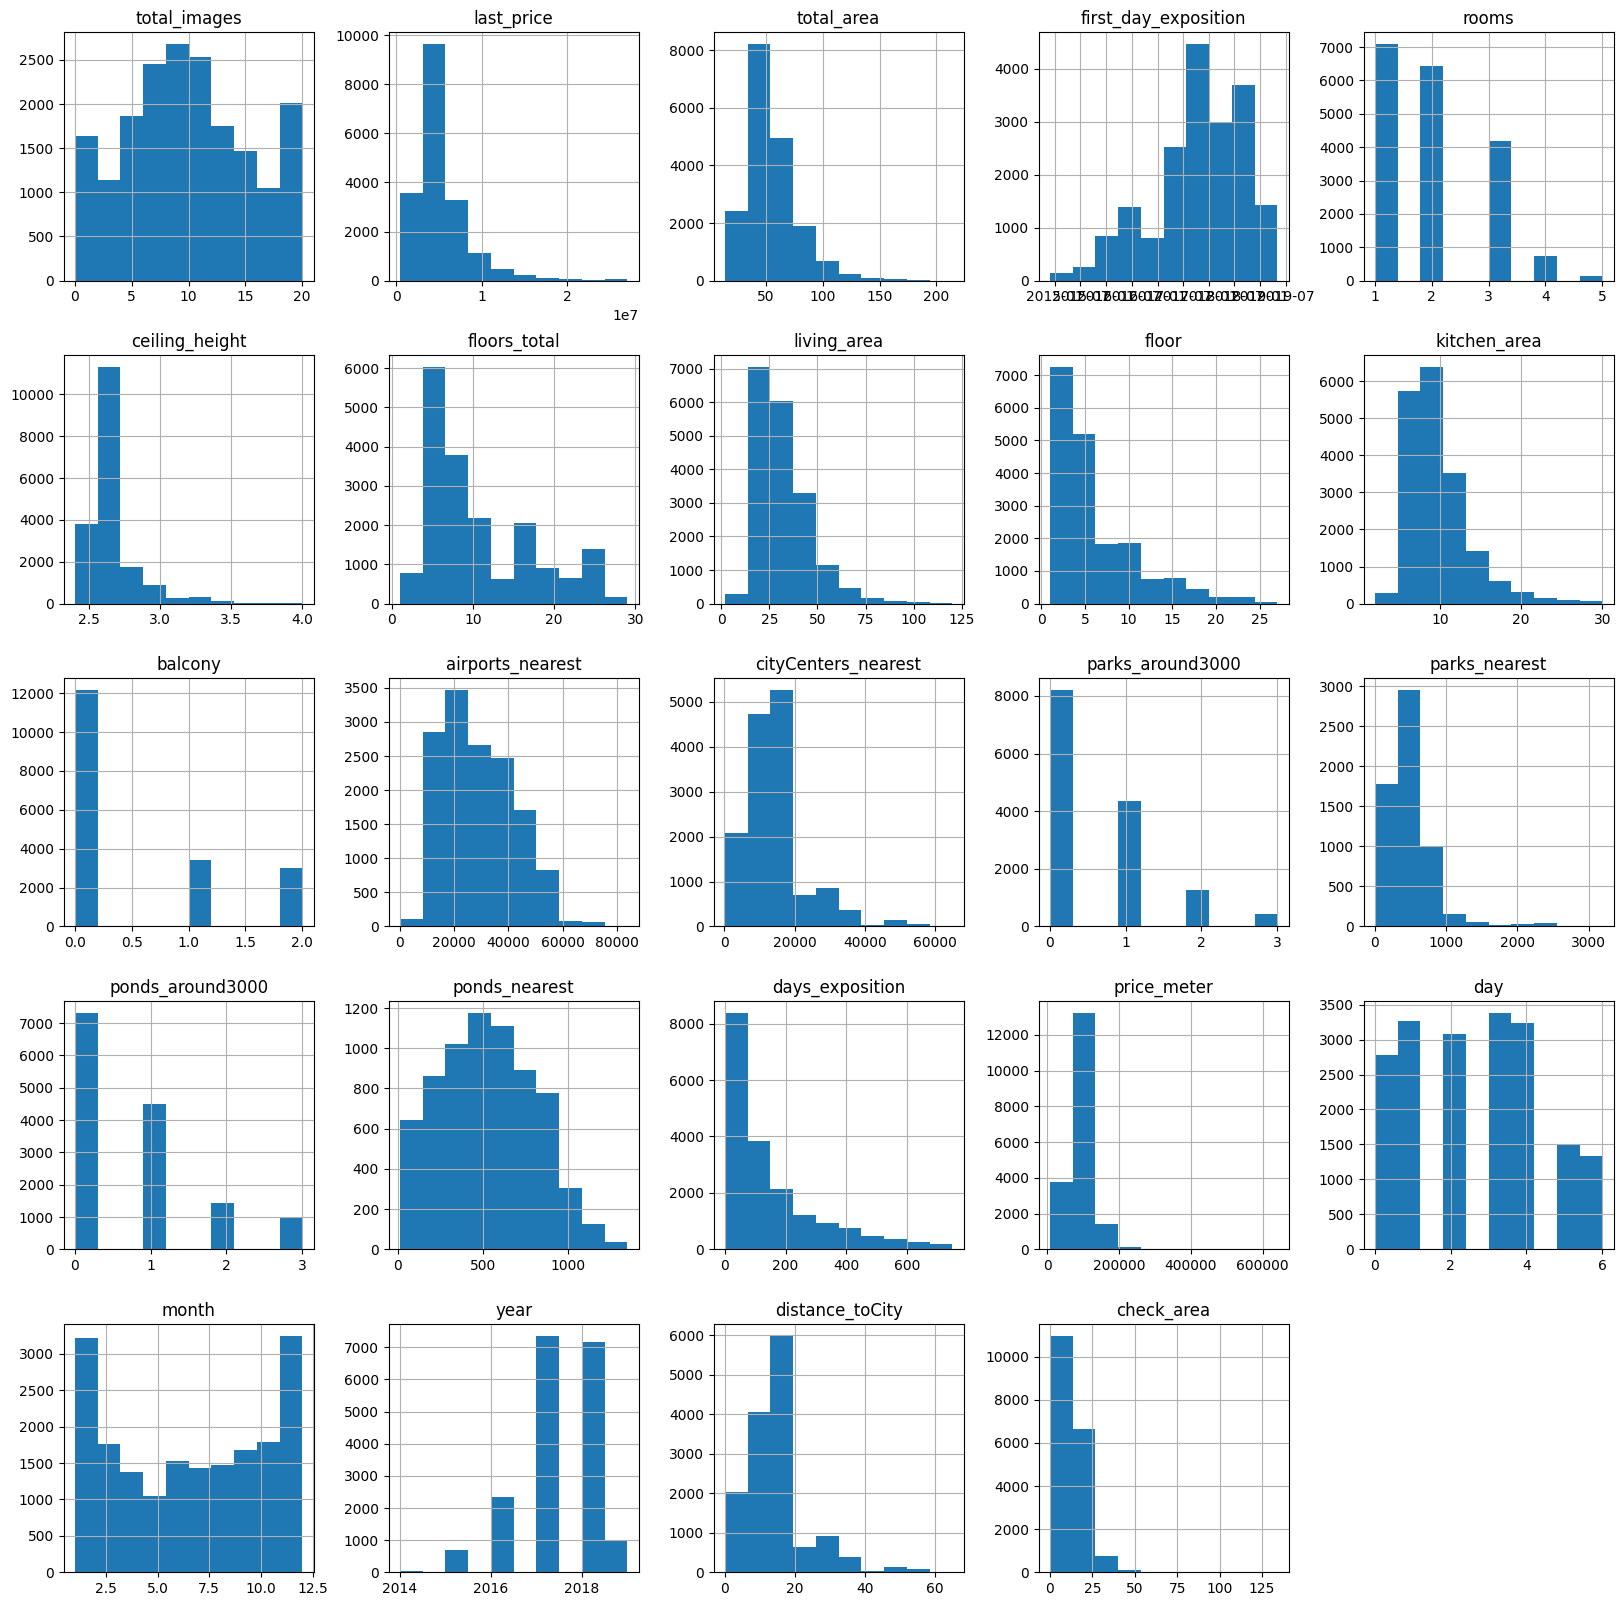

In [67]:
data.hist(figsize=(20, 20));

In [68]:
data = data.query('price_meter <= 300000')
data = data.query('check_area <= 50')

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** в этом разделе мы создали новые столбцы, посчитали и добавили интересующие нас параметры, которые мы будем исследовать в дальнейшем.

## Проведём исследовательский анализ данных

Для начала, посчитаем попарный коэффициент корреляции Пирсона, между ценой объекта `last_price` и остальными параметрами:

In [69]:
data.corr().last_price.sort_values(ascending=False)

last_price             1.000000
total_area             0.761634
price_meter            0.668252
living_area            0.660981
check_area             0.659763
kitchen_area           0.576378
rooms                  0.477383
ceiling_height         0.396786
ponds_around3000       0.191493
parks_around3000       0.162151
total_images           0.133823
floors_total           0.107743
days_exposition        0.095882
floor                  0.086295
parks_nearest          0.072279
is_apartment           0.006071
month                  0.002906
balcony                0.000431
day                   -0.011656
year                  -0.036788
open_plan             -0.038322
airports_nearest      -0.042253
studio                -0.054299
ponds_nearest         -0.086367
cityCenters_nearest   -0.355849
distance_toCity       -0.356949
Name: last_price, dtype: float64

### Изучим параметры объектов и узнаем, какие факторы больше всего влияют на стоимость объекта

Построим диаграммы рассеяния, зависимость цены объекта(`last_price`) от общей площади(`total_area`):

Коэффициент корреляции Пирсона 0.76


count    18485.000000
mean        54.224134
std         21.160104
min         14.000000
25%         39.000000
50%         49.000000
75%         64.100000
max        185.800000
Name: total_area, dtype: float64

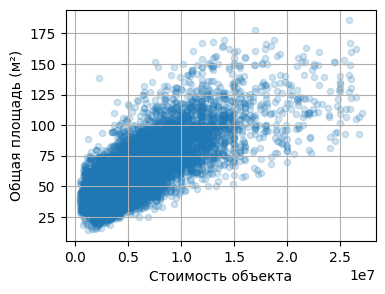

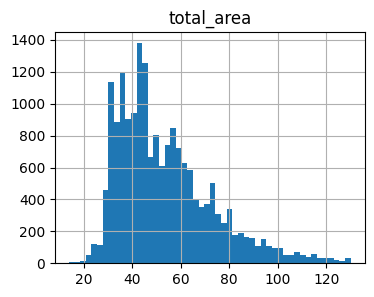

In [70]:
data.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.2, figsize=(4, 3),
                                         xlabel = 'Стоимость объекта',
                                         ylabel = 'Общая площадь (м²)');
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['total_area']), 2))
data.hist('total_area', bins = 50, figsize=(4, 3), range=(14, 130));
data.total_area.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли положительную корреляцию:
- с увеличением площади, увеличивается стоимость объекта, коэффициент корреляции Пирсона 0.76;
- больше всего объявлений с общей площадью от 30 до 64 квадратных метров.

---------------------------------------
Построим диаграммы рассеяния, зависимость цены объекта(`last_price`) от жилой площадь(`living_area`):

Коэффициент корреляции Пирсона 0.66


count    18485.000000
mean        31.002790
std         14.570353
min          2.000000
25%         18.200000
50%         29.000000
75%         39.300000
max        120.000000
Name: living_area, dtype: float64

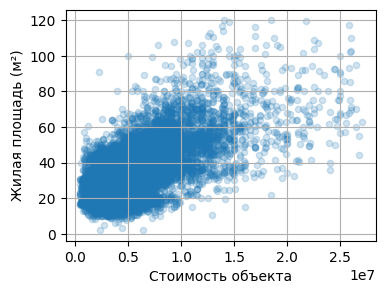

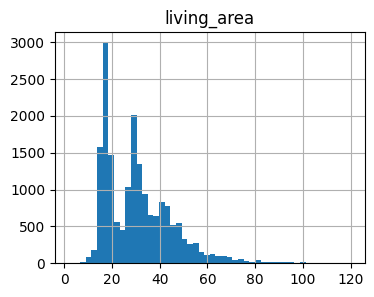

In [71]:
data.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.2, figsize=(4, 3),
                                         xlabel = 'Стоимость объекта',
                                         ylabel = 'Жилая площадь (м²)');
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['living_area']), 2))
data.hist('living_area', bins = 50, figsize=(4, 3));
data.living_area.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли положительную корреляцию:
- с увеличением площади, увеличивается стоимость объекта, коэффициент корреляции Пирсона 0.66.
- больше всего объявлений с жилой площадью от 18 до 39 квадратных метров.

---------------------------------------
Построим диаграммы рассеяния, зависимость цены объекта(`last_price`) от площади кухни(`kitchen_area`):

Коэффициент корреляции Пирсона 0.58


count    18485.000000
mean         9.650585
std          3.818398
min          2.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         30.000000
Name: kitchen_area, dtype: float64

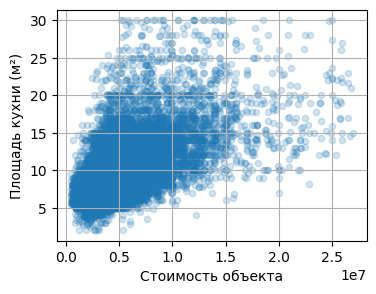

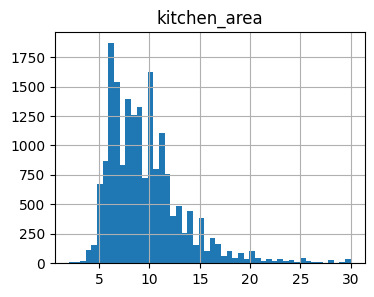

In [72]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.2, figsize=(4, 3),
                                         xlabel = 'Стоимость объекта',
                                         ylabel = 'Площадь кухни (м²)');
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['kitchen_area']), 2))
data.hist('kitchen_area', bins = 50, figsize=(4, 3));
data.kitchen_area.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли положительную корреляцию:
- с увеличением площади, увеличивается стоимость объекта, коэффициент корреляции Пирсона 0.58.
- больше всего объявлений с площадью кухни от 7 до 11 квадратных метров.

---------------------------------------
Построим гистограмму цены объекта(`last_price`):

count    1.848500e+04
mean     5.163210e+06
std      3.075915e+06
min      4.300000e+05
25%      3.330000e+06
50%      4.400000e+06
75%      6.100000e+06
max      2.700000e+07
Name: last_price, dtype: float64

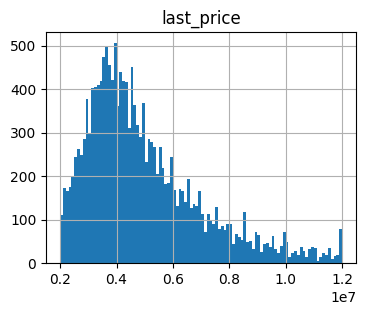

In [73]:
data.hist('last_price', bins = 100, figsize=(4, 3), range=(2000000, 12000000));
data.last_price.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** больше всего объявлений от 3.3 до 6.1 млн.

---------------------------------------
Построим график, зависимость цены объекта(`last_price`) от количества комнат(`rooms`):

Коэффициент корреляции Пирсона 0.48


count    18485.000000
mean         1.939681
std          0.906639
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

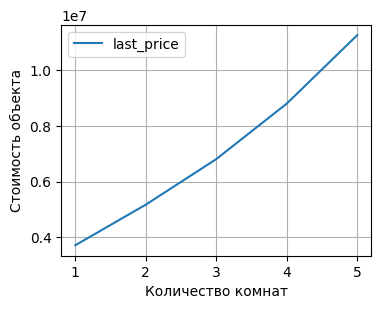

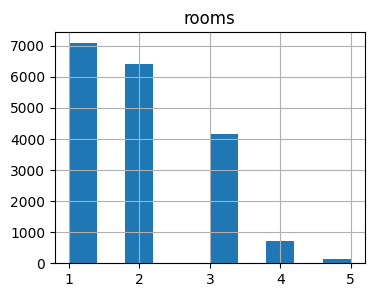

In [74]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(4, 3),
                                         xlabel = 'Количество комнат',
                                         ylabel = 'Стоимость объекта')
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['rooms']), 2))
data.hist('rooms', bins = 10, figsize=(4, 3));
data.rooms.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли положительную корреляцию:
- цены увеличиваются с увеличением комнат, корреляция Пирсона 0.48;
- чем меньше комнат, тем больше объявлений.

---------------------------------------
Построим график, зависимость цены объекта(`last_price`) от высоты потолков(`ceiling_height`):

Коэффициент корреляции Пирсона 0.4


count    18485.000000
mean         2.676810
std          0.177824
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

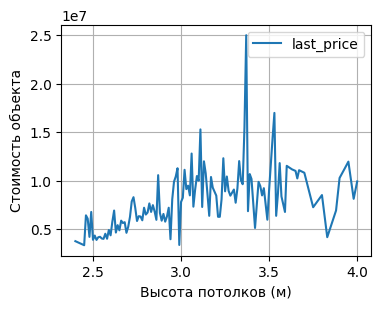

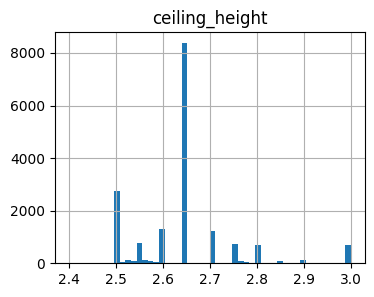

In [75]:
data.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(4, 3),
                                         xlabel = 'Высота потолков (м)',
                                         ylabel = 'Стоимость объекта')
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['ceiling_height']), 2))
data.hist('ceiling_height', bins = 50, figsize=(4, 3), range=(2.4, 3));
data.ceiling_height.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли положительную корреляцию:
- цена увеличивается с увеличением высоты потолков до ~ 3.3 метра, корреляция Пирсона 0.4.
- в среднем высото потолка в объявлении 2.65 м.

---------------------------------------
Построим график, зависимость цены объекта в м²(`price_meter`) от этажа(`floor`):

count    18485.000000
mean         5.965323
std          4.904966
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

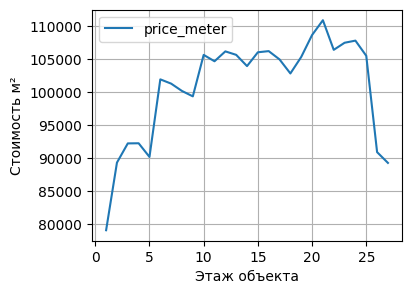

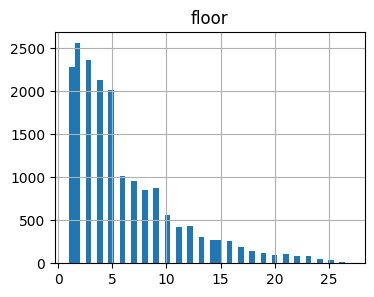

In [76]:
data.pivot_table(index='floor', values='price_meter').plot(grid=True, figsize=(4, 3),
                                         xlabel = 'Этаж объекта',
                                         ylabel = 'Стоимость м²')
data.hist('floor', bins = 50, figsize=(4, 3));
data.floor.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли закономерность:
- цена м² объекта увеличивается с этажем объекта;
- больше всего объявлений на 1-9 этаже.

---------------------------------------
Построим график, зависимость цены объекта(`last_price`) от типа этажа(`floor_category`):

count      18485
unique         3
top       другой
freq       13707
Name: floor_category, dtype: object

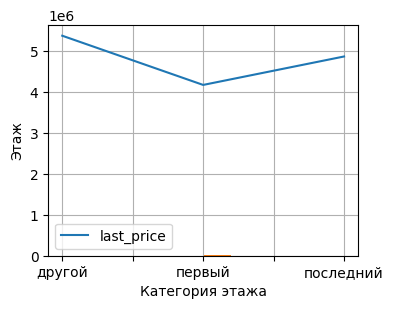

In [77]:
data.pivot_table(index='floor_category', values='last_price').plot(grid=True, figsize=(4, 3),
                                         xlabel = 'Категория этажа',
                                         ylabel = 'Этаж');
data['floor_category'].hist(figsize=(4, 3));
data.floor_category.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив график, нашли закономерность:
- цена за квартиру на первом и последнем этаже ниже;

---------------------------------------
Построим график, зависимость цены объекта(`last_price`) от количества этажей в доме(`floors_total`):

count    18485.000000
mean        10.867622
std          6.593480
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

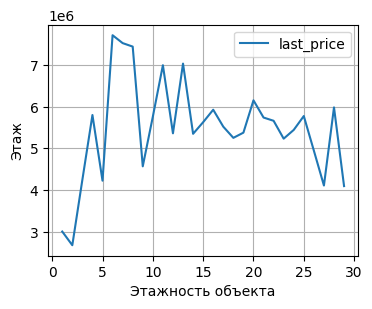

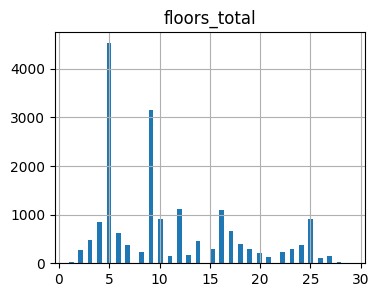

In [78]:
data.pivot_table(index='floors_total', values='last_price').plot(grid=True, figsize=(4, 3),
                                         xlabel = 'Этажность объекта',
                                         ylabel = 'Этаж');
data.hist('floors_total', bins = 60, figsize=(4, 3));
data.floors_total.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли закономерность:
- цены на квартиры выше, этажность которых от 2 по 23;
- цены на квартиры с 6-8 этажи выше.
- больше всего объявлений 5 и 9 этажных объектов.

---------------------------------------
Построим диаграмму рассеяния, зависимость цены объекта(`last_price`) от расстояние до центра города(`cityCenters_nearest`):

Коэффициент корреляции Пирсона -0.36


count    14178.000000
mean     14641.479898
std       8461.820379
min        208.000000
25%      10139.500000
50%      13368.000000
75%      16536.750000
max      64857.000000
Name: cityCenters_nearest, dtype: float64

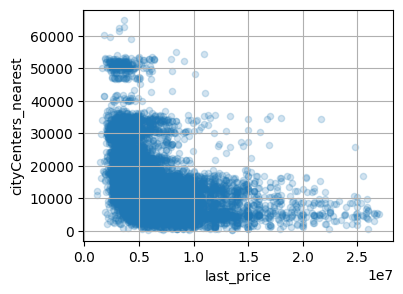

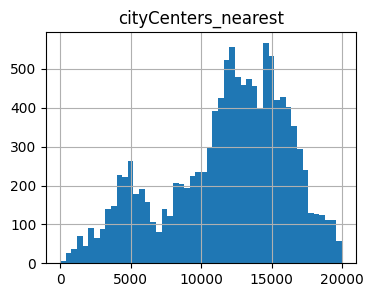

In [79]:
data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', grid=True, alpha=0.2, figsize=(4, 3))
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['cityCenters_nearest']), 2))
data.hist('cityCenters_nearest', bins = 50, figsize=(4, 3), range=(0, 20000));
data.cityCenters_nearest.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли закономерность:
- цены на объекты выше, чем ближе к центру города, коэффициент Пирсона -0.36;
- большинство объявлений находится на расстоянии 10-17 км. до центра города.

---------------------------------------
Построим диаграмму рассеяния, зависимость цены объекта(`last_price`) от расстояние до ближайшего аэропорта(`airports_nearest`):

Коэффициент корреляции Пирсона -0.04


count    14159.000000
mean     28920.397556
std      12890.470821
min          0.000000
25%      18233.000000
50%      26980.000000
75%      37536.500000
max      83758.000000
Name: airports_nearest, dtype: float64

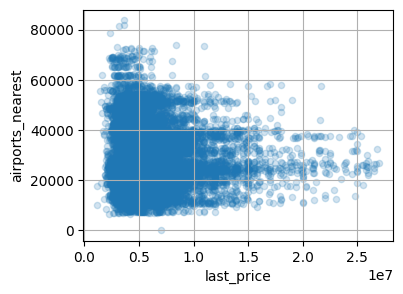

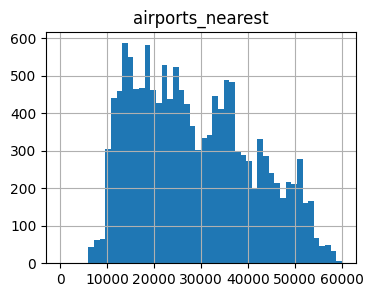

In [80]:
data.plot(x='last_price', y='airports_nearest', kind='scatter', grid=True, alpha=0.2, figsize=(4, 3))
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['airports_nearest']), 2))
data.hist('airports_nearest', bins = 50, figsize=(4, 3), range=(0, 60000));
data.airports_nearest.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли закономерность, цены на квартиры:
- слабо зависят от расстояние до аэропорта.

---------------------------------------
Построим диаграмму рассеяния, зависимость цены объекта(`last_price`) от расстояние до ближайшего парка(`parks_nearest`):

Коэффициент корреляции Пирсона 0.07


count    6011.000000
mean      492.063217
std       339.784492
min         1.000000
25%       288.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

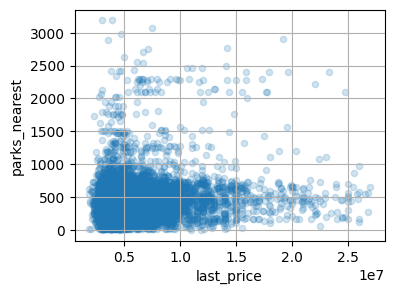

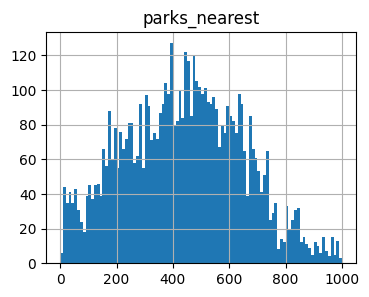

In [81]:
data.plot(x='last_price', y='parks_nearest', kind='scatter', grid=True, alpha=0.2, figsize=(4, 3))
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['parks_nearest']), 2))
data.hist('parks_nearest', bins = 100, figsize=(4, 3), range=(0, 1000));
data.parks_nearest.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли закономерность, цены на квартиры:
- выше, чем ближе к расстояние до ближайшего парка;
- в среднем от парка до объекта (рядом с которыми есть парк) расстояние 280-620 метров.

---------------------------------------
Построим диаграмму рассеяния, зависимость цены объекта(`last_price`) от расстояние до ближайшего водоёма (`ponds_nearest`):

Коэффициент корреляции Пирсона -0.09


count    6893.000000
mean      530.737995
std       275.801327
min        13.000000
25%       318.000000
50%       517.000000
75%       739.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

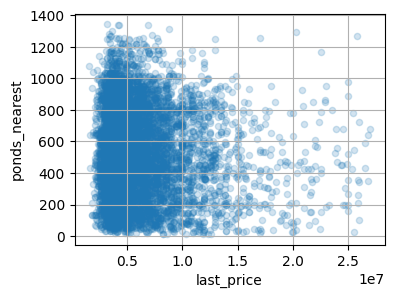

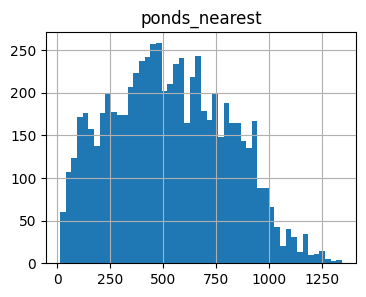

In [82]:
data.plot(x='last_price', y='ponds_nearest', kind='scatter', grid=True, alpha=0.2, figsize=(4, 3))
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['ponds_nearest']), 2))
data.hist('ponds_nearest', bins = 50, figsize=(4, 3));
data.ponds_nearest.describe()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив графики, нашли закономерность:
- цены на объекты слабо зависят от расстояние до ближайшего водоёма.
- в среднем от водоема до объекта (рядом с которыми есть водоем) расстояние 320-740 метров.

---------------------------------------
Построим графики, зависимость цены объекта в м²(`price_meter`) от дня публикации(`day`):

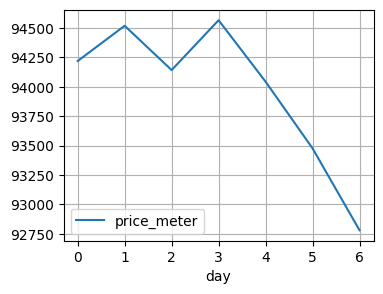

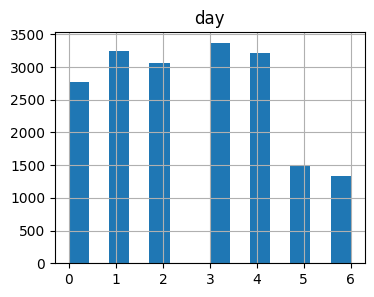

In [83]:
data.pivot_table(index='day', values='price_meter').plot(grid=True, figsize=(4, 3));
data.hist('day', bins = 14, figsize=(4, 3));

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- объявления размещенные в будни цены выше, чем в выходные дни;
- в выходные дни размещают ~ в 2 раза меньше объявлений.

---------------------------------------
Построим графики, зависимость цены объекта м²(`price_meter`) от месяца публикации(`month`):

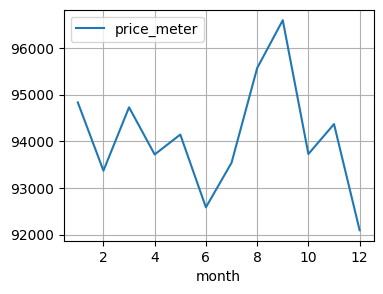

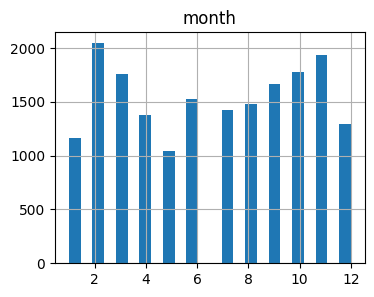

In [84]:
data.pivot_table(index='month', values='price_meter').plot(grid=True, figsize=(4, 3))
data.hist('month', bins = 24, figsize=(4, 3));

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- самые низкие цены опубликованы в июне и декабре, самые высокие август-сентябрь;
- больше всего объявлений опубликованы в феврале и ноябре, меньше всего в январе и мае.

---------------------------------------
Построим графики, зависимость цены объекта м²(`price_meter`) от года публикации(`year`):

Коэффициент корреляции Пирсона 0.67


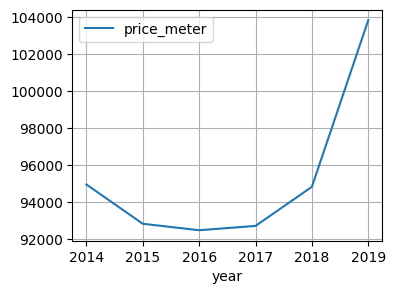

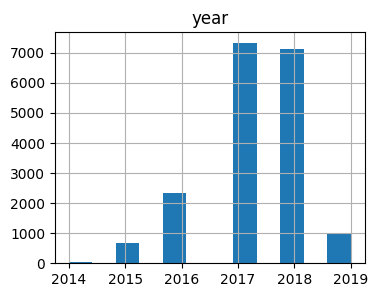

In [85]:
data.pivot_table(index='year', values='price_meter').plot(grid=True, figsize=(4, 3));
print("Коэффициент корреляции Пирсона", round(data['last_price'].corr(data['price_meter']), 2))
data.hist('year', bins = 12, figsize=(4, 3));

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** с 2017 года стоимость квадратного метра жилья начала рости, коэффициент Пирсона 0.67, так же увеличивается количество объявлений.


### Изучим, как быстро продавались квартиры. Этот параметр показывает, сколько дней было размещено каждое объявление. 

Построим диаграмму размаха по столбцу `days_exposition` и посмотрим ститистику методом describe():

count    18485.000000
mean       150.236841
std        156.741906
min          1.000000
25%         43.000000
50%         90.000000
75%        205.000000
max        748.000000
Name: days_exposition, dtype: float64

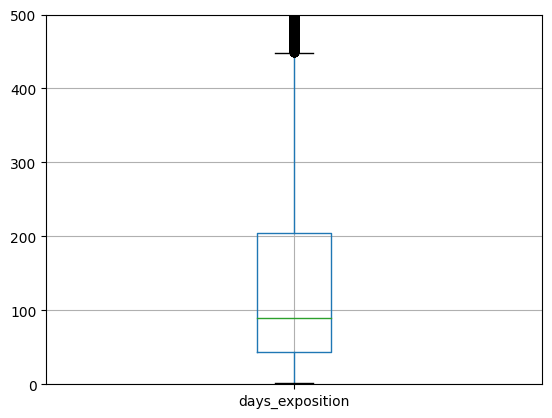

In [86]:
data.boxplot('days_exposition')
plt.ylim(0, 500);
data.days_exposition.describe()

Построим гистограмму (столбец `days_exposition`):

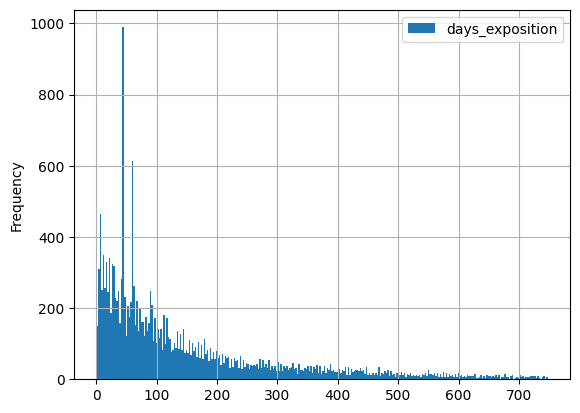

In [87]:
data.plot(y='days_exposition', kind='hist', bins=300, grid=True);

Видим выбросы, надём эти дни:

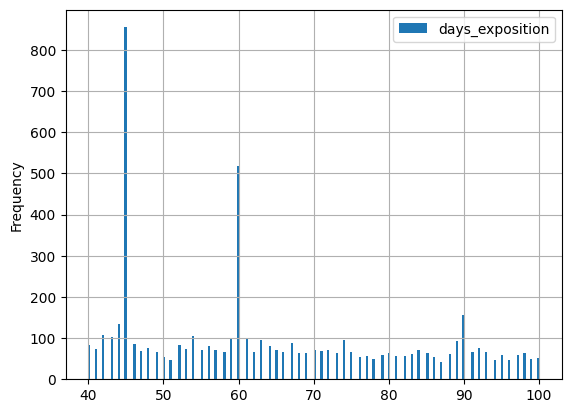

In [88]:
data.plot(y='days_exposition', kind='hist', bins=200, grid=True, range=(40, 100));

Это 45, 60 и 90 день, скорее всего в эти дни закончился срок размещения объявления и он автоматически снялся.

Посчитаем среднее и медиану продолжительности объявления:

Построим сводную таблицу взаимосвязи между количеством комнат **rooms** и сколько дней было размещено объявление  **days_exposition**, посчитаем количество объявлений, медианну и среднее кол-во дней для каждой категории.

In [89]:
rooms_data_exposition = data.pivot_table(index='rooms', 
                 values='days_exposition', 
                 aggfunc=['count', 'median', 'mean'])
rooms_data_exposition.columns = ['Кол-во объявлений', 'Медианная', 'Средняя']
rooms_data_exposition.style.format({'Средняя': '{:.0f}', 'Медианная': '{:.0f}'})

,Кол-во объявлений,Медианная,Средняя
rooms,,,
1,7079,76,138
2,6417,89,146
3,4148,107,168
4,707,137,194
5,134,150,221


Построим график для визуализации взаимосвязи между количеством комнат и сколько дней было размещено объявление:

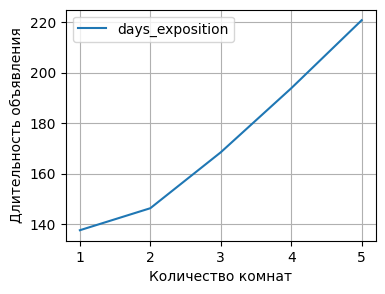

In [90]:
data.pivot_table(index='rooms', values='days_exposition') \
        .plot(grid=True, 
        figsize=(4, 3),
        xlabel = 'Количество комнат',
        ylabel = 'Длительность объявления');

Квартиры с меньшим количеством комнат, имеют меньшую общую площаль, и такие квартиры быстрее продаются.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив таблицу и график, нашли положительную корреляцию:
- чем больше площадь объекта, тем дольше она продается;
- медианная продолжительность объявления 90 дней;
- быстрыми продажами можно считать до 43 дней, долгими выше 205 дней.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Построим сводную таблицу взаимосвязи между населенным пунктом **local_name** и средней стоимости квадратного метра **price_meter**:

In [91]:
local_meter = data.pivot_table(index='local_name', 
                 values='price_meter', 
                 aggfunc=['count', 'mean'])
local_meter.columns = ['Кол-во объявлений', 'Средняя цена за кв.м.']
local_meter = local_meter.sort_values(by='Кол-во объявлений',ascending=False)[:10]

Таблица с населенными пунктами с самой высокой стоимостью квадратного метра:

In [92]:
local_meter.sort_values(by='Средняя цена за кв.м.',ascending=False) \
    .style.format({'Средняя цена за кв.м.': '{:.0f}'})

,Кол-во объявлений,Средняя цена за кв.м.
local_name,,
Санкт-Петербург,12105,107221
Пушкин,277,100902
Кудрово,408,94665
Парголово,294,89537
Мурино,507,85723
Шушары,387,78166
Колпино,292,74575
Гатчина,237,68203
Всеволожск,303,66707


Таблица с населенными пунктами с самой низкой стоимостью квадратного метра:

In [93]:
local_meter.sort_values(by='Средняя цена за кв.м.',ascending=True) \
    .style.format({'Средняя цена за кв.м.': '{:.0f}'})

,Кол-во объявлений,Средняя цена за кв.м.
local_name,,
Выборг,192,57669
Всеволожск,303,66707
Гатчина,237,68203
Колпино,292,74575
Шушары,387,78166
Мурино,507,85723
Парголово,294,89537
Кудрово,408,94665
Пушкин,277,100902


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** из 10 населенных пунктов, у которых наибольшее кол-во объявлений:
- самые высокие цены за кв.м. в населенных пунктах: Санкт-Петербург, Пушкин, Кудрово;
- самые низкие: Выборг, Всеволожск, Гатчина.

In [94]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,12105,5100000.0
посёлок Мурино,477,3400000.0
посёлок Шушары,387,3900000.0
Всеволожск,303,3300000.0
посёлок Парголово,294,4020000.0
Колпино,292,3500000.0
Пушкин,277,4800000.0
деревня Кудрово,270,3747500.0
Гатчина,237,3000000.0


### Изучим квартиры в Санкт-Петербурге, вычислим среднюю цену каждого километра. Посмотрим, как стоимость объектов зависит от расстояния до центра города

Построим сводную таблицу взаимосвязи между расстоянием до центра города (км) **distance_toCity** и средней стоимости квадратного метра **price_meter**, посчитаем количество объявлений в категории.

In [95]:
distance_meter = data.query('local_name == "Санкт-Петербург"').pivot_table(index='distance_toCity', 
                                                          values='price_meter', 
                                                          aggfunc=('count', 'mean'))
distance_meter.columns = ['Кол-во объявлений', 'Средняя цена за кв.м.']
distance_meter.style.format({'Кол-во объявлений': '{:.0f}', 'Средняя цена за кв.м.': '{:.0f}'})

,Кол-во объявлений,Средняя цена за кв.м.
distance_toCity,,
0.0,10,116744
1.0,115,129313
2.0,180,123138
3.0,224,111703
4.0,448,121319
5.0,586,127708
6.0,409,126590
7.0,272,124891
8.0,447,119691


Визуализируем сводную таблицу, не включая нерепрезентативные данные (основываясь на кол-ве объявлений):

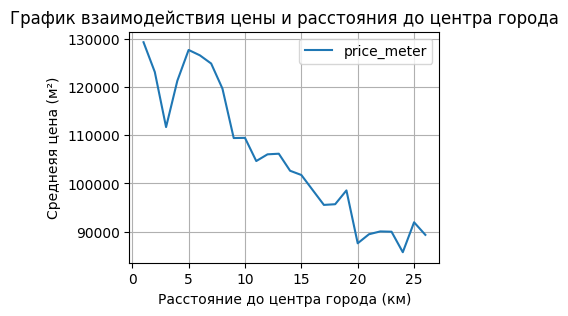

In [96]:
data.query('local_name == "Санкт-Петербург" & 1 <= distance_toCity <= 26') \
        .pivot_table(index='distance_toCity', values='price_meter') \
        .plot(grid=True, figsize=(4, 3), title = 'График взаимодействия цены и расстояния до центра города', 
                                         xlabel = 'Расстояние до центра города (км)',
                                         ylabel = 'Среднеяя цена (м²)');

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** изучив таблицу и график мы видим отрицательную корреляцию:
- чем дальше от центра города, тем меньше средняя цена квардатного метра.

---------------------------------------

## Общий вывод

Получив данные, нам досталось 23699 строк и 22 столбца. Мы изучили их и нашли пропущенные значения в столбцах, изменили типы данных столбцов, где это требуется, нашли и устранили редкие и выбивающиеся значения. Создали новые столбцы, посчитали и добавили интересующие нас параметры. У нас получилось 18485 строк и 30 столбцов. Потом мы исследовали каждый параметр из данных и нашли закономерности, больше всего влияющие на стоимость и скорость продажи объекта. Посчитали среднюю цену одного квадратного метра в населённых пунктах с наибольшим числом объявлений. А так же, вычислили среднюю цену каждого километра для квартир в Санкт-Петербурге.

**Рыночная стоимость объектов:**
 - самый дорогой квадратный метр объекта: 
| Населённый пункт     | Средняя цена за м²|
| -------------       | ------------- |
| Санкт-Петербург  | 107 тыс.  |
| Пушкин        | 100.9 тыс.  |
| Кудрово       | 94.5 тыс.  |

 - сымый дешевый квадратный метр объекта:
| Населённый пункт     | Средняя цена за м²|
| -------------       | ------------- |
| Выборг  | 57.7 тыс.  |
| Всеволожск        | 66.7 тыс.  |
| Гатчина       | 68.2 тыс.  |

**Больше всего объявлений:**
- с общей площадью от 30 до 64 м²;
- с жилой площадью от 18 до 39 м²;
- с площадью кухни от 7 до 11 м²;
- с общей стоимостью от 3.3 до 6.1 млн.;
- однокомнатные;
- высота потолков 2.65 м.;
- на 1-9 этаже, с этажностью объекта 5 и 9;
- находится на расстоянии 10-17 км. до центра города;
- в среднем до парка и/или водоема 500 м.;
- опубликованы в феврале и ноябре, меньше всего в январе и мае;

**Взаимосвязь стоимости объекта:**
- чем больше комнат у объекта, тем больше площадь, тем выше стоимость;
- объекты с меньшей площадью продаются быстрее;
- чем выше высота потолка на объекте, тем выше стоимость;
- стоимость объекта на первом и последнем этаже ниже рыночной;
- стоимость объекта с 6-8 этажи выше рыночной;
- чем ближе к центру города (Санкт-Петерубург), тем выше стоимость объекта;
- стоимость объекта ниже, если его опубликовали в субботу или воскресенье;
- самые низкие цены опубликованы в июне и декабре, самые высокие август-сентябрь;
- стоимость квадратного метра объекта с 2017 года начала рости;
- медианная продолжительность объявления 90 дней, быстрыми продажами можно считать до 43 дней, долгими выше 205 дней.